<a href="https://colab.research.google.com/github/GuilhermeNL01/Trabalho-Final-Novas-Tecnologias/blob/main/Trabalho_NovasTecnologias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final Novas Tecnologias

- Felipe Vasconcelos Cardoso
- Guilherme Nunes Lobo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Lançamentos Comerciais Distribuidoras.csv'
df = pd.read_csv(file_path, sep=';', on_bad_lines='skip')

df.head()

,DATA_LANCAMENTO_OBRA,TITULO_ORIGINAL,CPB_ROE,TIPO_OBRA,PAIS_OBRA,PUBLICO_TOTAL,RENDA_TOTAL,RAZAO_SOCIAL_DISTRIBUIDORA,REGISTRO_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA
0,18/04/2024,SEM CORAÇÃO,B2400126700000,FICÇÃO,ITÁLIA,4275,"R$ 41.965,91",VITRINE FILMES LTDA,16713.0,11.620.976/0001-83
1,18/04/2024,SILVER HAZE,E2300345200000,FICÇÃO,HOLANDA,194,"R$ 4.017,03",BITELLI FILMS LTDA,52026.0,47.721.628/0001-40
2,18/04/2024,UM TIRO NO ESCURO,B2300243500000,DOCUMENTÁRIO,BRASIL,83,"R$ 830,00",VEREDA INTERNACIONAL AUDIOVISUAL LTDA,20529.0,09.112.697/0001-67
3,04/04/2024,ARTHUR THE KING,E2400002700000,FICÇÃO,ESTADOS UNIDOS,4062,"R$ 100.050,06",DIAMOND FILMS DO BRASIL PRODUÇÃO E DISTRIBUIÇÃ...,22724.0,17.095.184/0001-13
4,04/04/2024,DOMINGO À NOITE,B2200374800000,FICÇÃO,BRASIL,1854,"R$ 32.293,53",O2 PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICAS LTDA.,63.0,67.431.718/0001-03


In [ ]:
df.info()

missing_values = df.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATA_LANCAMENTO_OBRA        6114 non-null   object 
 1   TITULO_ORIGINAL             6114 non-null   object 
 2   CPB_ROE                     6114 non-null   object 
 3   TIPO_OBRA                   6114 non-null   object 
 4   PAIS_OBRA                   6114 non-null   object 
 5   PUBLICO_TOTAL               6114 non-null   int64  
 6   RENDA_TOTAL                 6114 non-null   object 
 7   RAZAO_SOCIAL_DISTRIBUIDORA  6114 non-null   object 
 8   REGISTRO_DISTRIBUIDORA      6113 non-null   float64
 9   CNPJ_DISTRIBUIDORA          6114 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 477.8+ KB


DATA_LANCAMENTO_OBRA          0
TITULO_ORIGINAL               0
CPB_ROE                       0
TIPO_OBRA                     0
PAIS_OBRA                     0
PUBLICO_TOTAL                 0
RENDA_TOTAL                   0
RAZAO_SOCIAL_DISTRIBUIDORA    0
REGISTRO_DISTRIBUIDORA        1
CNPJ_DISTRIBUIDORA            0
dtype: int64

In [ ]:
numeric_describe = df.describe()

categorical_describe = df.describe(include=['object'])

numeric_describe, categorical_describe


(       PUBLICO_TOTAL  REGISTRO_DISTRIBUIDORA
 count   6.114000e+03             6113.000000
 mean    3.370242e+05             9537.390152
 std     1.129653e+06            11128.685310
 min     1.000000e+00                6.000000
 25%     1.708750e+03              265.000000
 50%     1.139850e+04             4904.000000
 75%     1.125115e+05            16713.000000
 max     1.965648e+07            53644.000000,
        DATA_LANCAMENTO_OBRA  TITULO_ORIGINAL         CPB_ROE TIPO_OBRA  \
 count                  6114             6114            6114      6114   
 unique                 1047             5916            5944         9   
 top              03/12/2015  FRIDAY THE 13TH  E1300000100000    FICÇÃO   
 freq                     19                4              16      4712   
 
              PAIS_OBRA RENDA_TOTAL       RAZAO_SOCIAL_DISTRIBUIDORA  \
 count             6114        6114                             6114   
 unique              84        6092                             

In [ ]:

df_cleaned = df.dropna()


df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6113 entries, 0 to 6113
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATA_LANCAMENTO_OBRA        6113 non-null   object 
 1   TITULO_ORIGINAL             6113 non-null   object 
 2   CPB_ROE                     6113 non-null   object 
 3   TIPO_OBRA                   6113 non-null   object 
 4   PAIS_OBRA                   6113 non-null   object 
 5   PUBLICO_TOTAL               6113 non-null   int64  
 6   RENDA_TOTAL                 6113 non-null   object 
 7   RAZAO_SOCIAL_DISTRIBUIDORA  6113 non-null   object 
 8   REGISTRO_DISTRIBUIDORA      6113 non-null   float64
 9   CNPJ_DISTRIBUIDORA          6113 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 525.3+ KB


<Axes: xlabel='PUBLICO_TOTAL', ylabel='Count'>

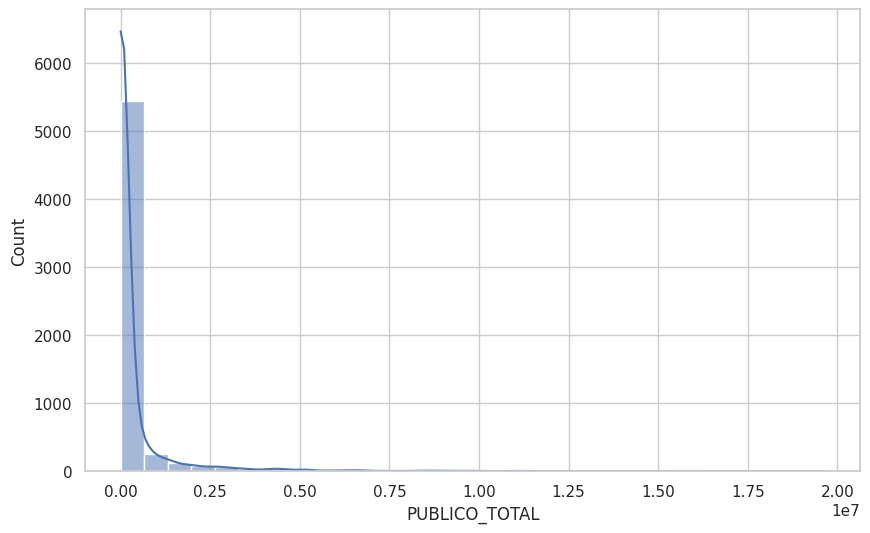

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

numeric_column_name = 'PUBLICO_TOTAL'

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[numeric_column_name], bins=30, kde=True)

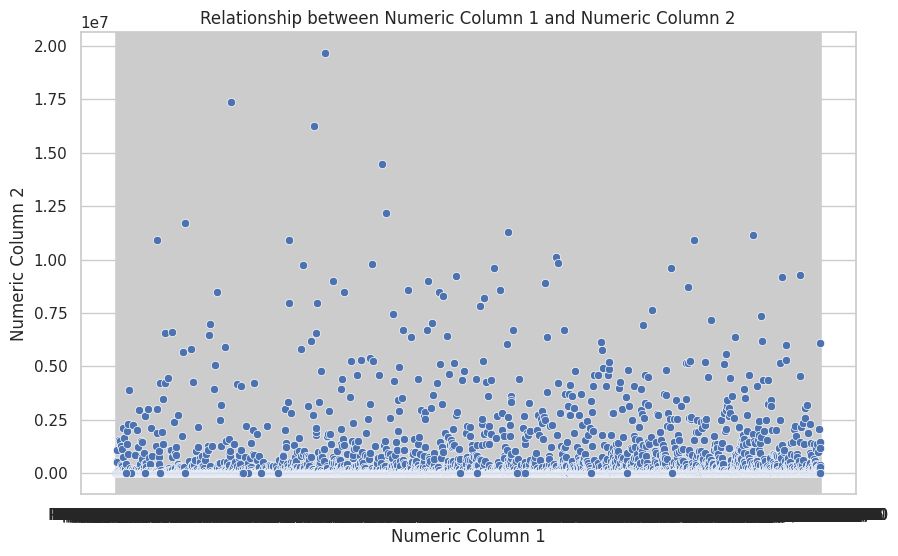

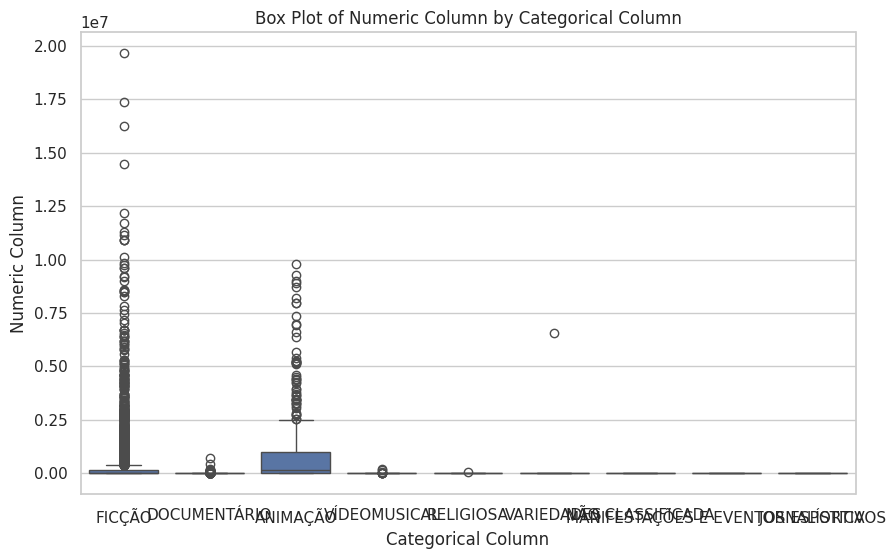

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RENDA_TOTAL', y='PUBLICO_TOTAL', data=df_cleaned)
plt.title('Relationship between Numeric Column 1 and Numeric Column 2')
plt.xlabel('Numeric Column 1')
plt.ylabel('Numeric Column 2')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_OBRA', y='PUBLICO_TOTAL', data=df_cleaned)
plt.title('Box Plot of Numeric Column by Categorical Column')
plt.xlabel('Categorical Column')
plt.ylabel('Numeric Column')
plt.show()
